# ETM 58D Spring 22 Final
## Pınar Köksal, 05.06.2022

For the analysis, following datasets are analyzed accordingly.

1- https://archive-beta.ics.uci.edu/ml/datasets/student+performance

2- https://archive-beta.ics.uci.edu/ml/datasets/absenteeism+at+work

3- http://archive.ics.uci.edu/ml/datasets/Turkish+Music+Emotion+Dataset

In [2]:
# Required packages:

# install.packages('rpart')
# install.packages('rpart.plot')
# install.packages('rattle')
# install.packages('randomForest')
# install.packages('ranger')


require(ggplot2)
require(tidyverse)
require(rpart)
require(dplyr)
require(rpart.plot)
require(rattle)
require(randomForest)
require(ranger)
require(data.table)

Loading required package: ggplot2
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ggplot2'"Loading required package: tidyverse
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'tidyverse'"Loading required package: rpart
Warning message:
"package 'rpart' was built under R version 3.6.3"Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: rpart.plot
Loading required package: rattle
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'rattle'"Loading required package: randomForest
War

## Dataset 1 - Student Performance
The first dataset student performance shows the test results of the math class along with some features like father's education, extra-curricular activities, current health status etc.

The target output is the final grade of the students. Total number of features are 32 and there are 382 students.

In [3]:
d1=read.table("C:/Users/pinar/Desktop/student/student-mat.csv",sep=";",header=TRUE)
head(d1)
str(d1)

set.seed(1234)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [10]:
# Test and train split

split1 <- sample(c(rep(0, 0.7 * nrow(d1)), rep(1, 0.3 * nrow(d1))))

traindata1 <- d1[split1 == 0, ]
testdata1 <- d1[split1 == 1, ]

head(traindata1)
head(testdata1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
5,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
7,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
10,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
14,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
17,GP,F,16,U,GT3,T,4,4,services,services,...,3,2,3,1,2,2,6,13,14,14
18,GP,F,16,U,GT3,T,3,3,other,other,...,5,3,2,1,1,4,4,8,10,10
21,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15


Warning message:
"extra=106 but the response has 18 levels (only the 2nd level is displayed)"

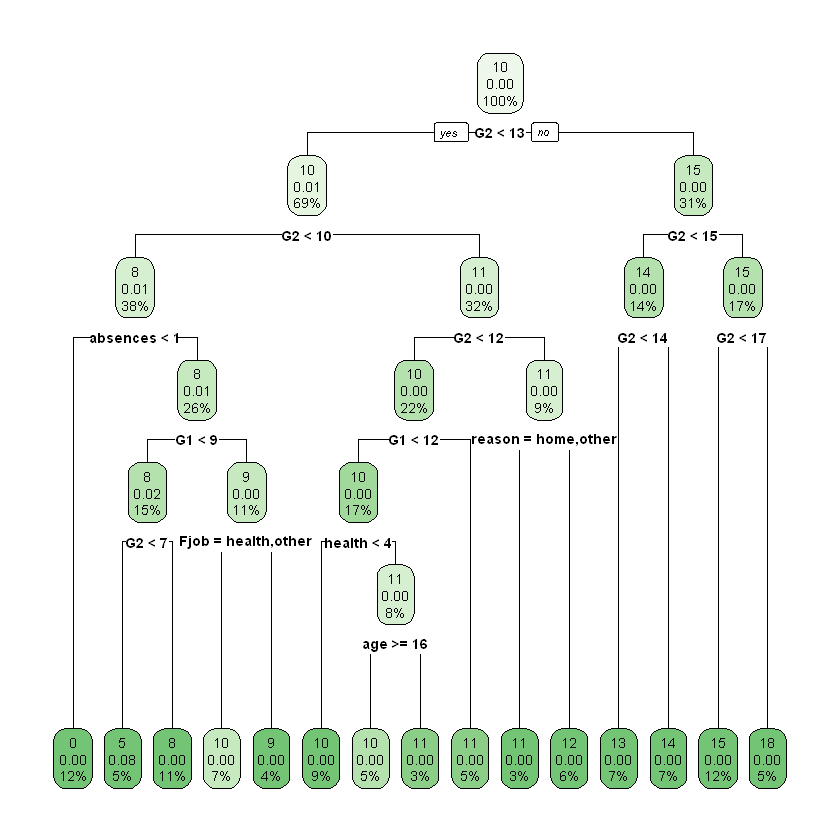

In [6]:
# Decision tree algorithm

  dt1 <- rpart(G3 ~ .,data= traindata1, method= "class")
  rpart.plot(dt1, type = 2, extra=106, box.palette = "Greens")

In [7]:
  # Prediction  
  predictdata_dt1 <- predict(dt1,testdata1, type="class")
  
  table_mat1_1 <- table(testdata1$G3, predictdata_dt1)
  table_mat1_1

  # Accuracy of DT
  accuracy_Test1_1 <- sum(diag(table_mat1_1)) / sum(table_mat1_1)
  print(paste('Accuracy for decision tree algorithm', accuracy_Test1_1))

    predictdata_dt1
      0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
  0  13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  5   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  6   0  0  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  7   1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  8   2  0  0  0  0  2  1  2  0  0  0  0  0  0  0  0  0  0
  9   2  0  0  0  0  3  1  1  1  0  0  0  0  0  0  0  0  0
  10  0  0  0  0  0  3  0  9  1  1  0  0  0  0  0  0  0  0
  11  0  0  0  0  0  0  0  6  4  0  0  0  0  0  0  0  0  0
  12  0  0  0  0  0  0  0  1  6  3  3  0  0  0  0  0  0  0
  13  0  0  0  0  0  0  0  0  2  2  9  1  0  0  0  0  0  0
  14  0  0  0  0  0  0  0  0  0  1  5  2  1  0  0  0  0  0
  15  0  0  0  0  0  0  0  0  0  0  0  1  6  0  0  0  0  0
  16  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0
  17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
  18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0
  19  0  0  0  0  0  0  0  0  0  0  

[1] "Accuracy for decision tree algorithm 0.420168067226891"


In [3]:
# Random forest algorithm

  rf1 <- randomForest(formula= G3 ~ ., data = traindata1, ntree= 500, nodesize =5)
  rf1
  
  # Number of trees with lowest MSE
  which.min(rf1$mse)
  
  # Produce variable importance plot
  varImpPlot(rf1) 



ERROR: Error in randomForest(formula = G3 ~ ., data = traindata1, ntree = 500, : "randomForest" fonksiyonu bulunamadı


Jupyter couldn't run randomForest function, so the results are copied from RStudio.

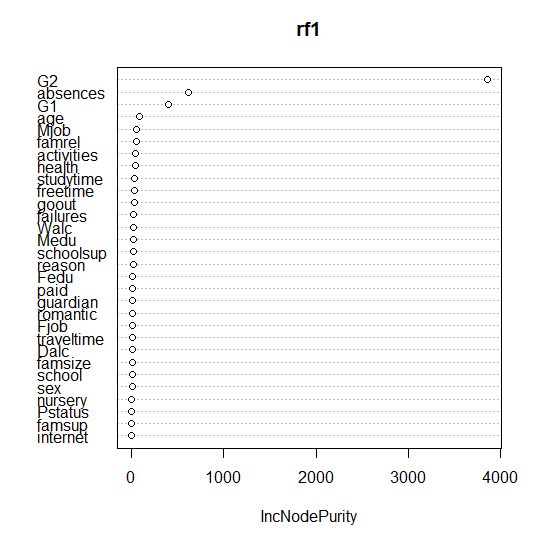

In [5]:
  # Tuning
  model_tuned1 <- tuneRF(
    traindata1[,1:32], # define predictor variables
    traindata1$G3, # define response variable
    ntreeTry=500,
    mtryStart=4, 
    stepFactor=1.5,
    improve=0.01,
    trace=FALSE) #don't show real-time progress
  
  best.m1 <- model_tuned1[model_tuned1[, 2] == min(model_tuned1[, 2]), 1]
  print(model_tuned1)
  print(best.m1)

ERROR: Error in tuneRF(traindata1[, 1:32], traindata1$G3, ntreeTry = 500, mtryStart = 4, : "tuneRF" fonksiyonu bulunamadı


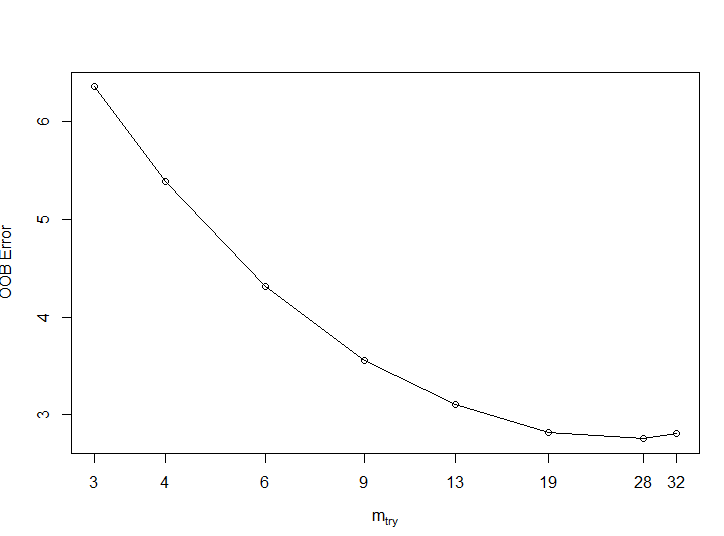

In [7]:
  # Set best.m
  set.seed(123)
  rf1 <- randomForest(formula= G3 ~ ., data = traindata1, ntree= 500, mtry=best.m1, nodesize= 5, type="class")
  rf1
  plot(rf1)

ERROR: Error in randomForest(formula = G3 ~ ., data = traindata1, ntree = 500, : "randomForest" fonksiyonu bulunamadı


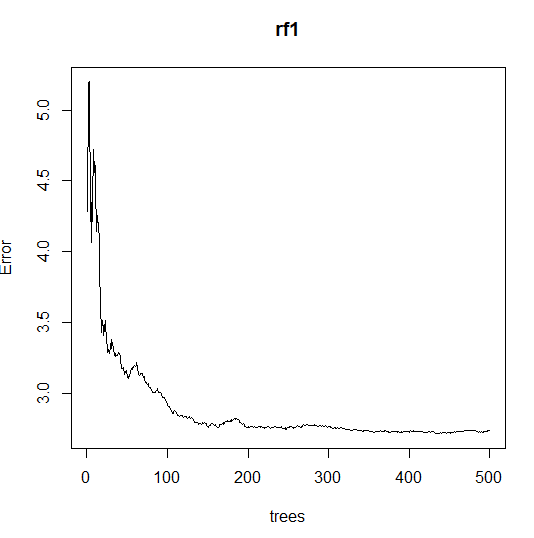

In [6]:
  # Prediction
  predictdata_rf1 <-predict(rf1, testdata1)
  table(predictdata_rf1, testdata1$G3)
  
  # Accuracy od RF
  table_mat2_1 <- table(testdata1$G3, predictdata_rf1)
  
  accuracy_Test2_1 <- sum(diag(table_mat2_1)) / sum(table_mat2_1)
  print(paste('Accuracy for random forest algorithm', accuracy_Test2_1))

ERROR: Error in predict(rf1, testdata1): 'rf1' nesnesi bulunamadı


### Conclusion for Dataset 1

DT accuracy is 42% whereas accuracy in RF is less than 0.8%. DT performed better for this data.

## Dataset 2 - Absenteeism at Work
The second dataset absenteeism was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

The target output is the absenteeism time in hours. Total number of features are 20 and there are 740 workers.

In [3]:
d2=fread("C:/Users/pinar/Desktop/Absenteeism_at_work_AAA/Absenteeism_at_work.csv")
head(d2)
str(d2)

set.seed(4321)

ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_div_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism
11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


Classes 'data.table' and 'data.frame':	740 obs. of  21 variables:
 $ ID                             : int  11 36 3 7 11 3 10 20 14 1 ...
 $ Reason_for_absence             : int  26 0 23 7 23 23 22 23 19 22 ...
 $ Month_of_absence               : int  7 7 7 7 7 7 7 7 7 7 ...
 $ Day_of_the_week                : int  3 3 4 5 5 6 6 6 2 2 ...
 $ Seasons                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Transportation_expense         : int  289 118 179 279 289 179 361 260 155 235 ...
 $ Distance_from_Residence_to_Work: int  36 13 51 5 36 51 52 50 12 11 ...
 $ Service_time                   : int  13 18 18 14 13 18 3 11 14 14 ...
 $ Age                            : int  33 50 38 39 33 38 28 36 34 37 ...
 $ Work_load_Average_div_day      : num  240 240 240 240 240 ...
 $ Hit_target                     : int  97 97 97 97 97 97 97 97 97 97 ...
 $ Disciplinary_failure           : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Education                      : int  1 1 1 1 1 1 1 1 1 3 ...
 $ Son           

In [4]:
# Test and train splitting
split2 <- sample(c(rep(0, 0.7 * nrow(d2)), rep(1, 0.3 * nrow(d2))))

traindata2 <- d2[split2 == 0, ]
testdata2 <- d2[split2 == 1, ]

head(traindata2)
head(testdata2)

ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_div_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism
11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8


ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_div_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism
3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
20,11,7,4,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,8
3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,11,7,5,1,189,29,13,33,239.554,...,0,1,2,0,0,2,69,167,25,8


Warning message:
"extra=106 but the response has 17 levels (only the 2nd level is displayed)"

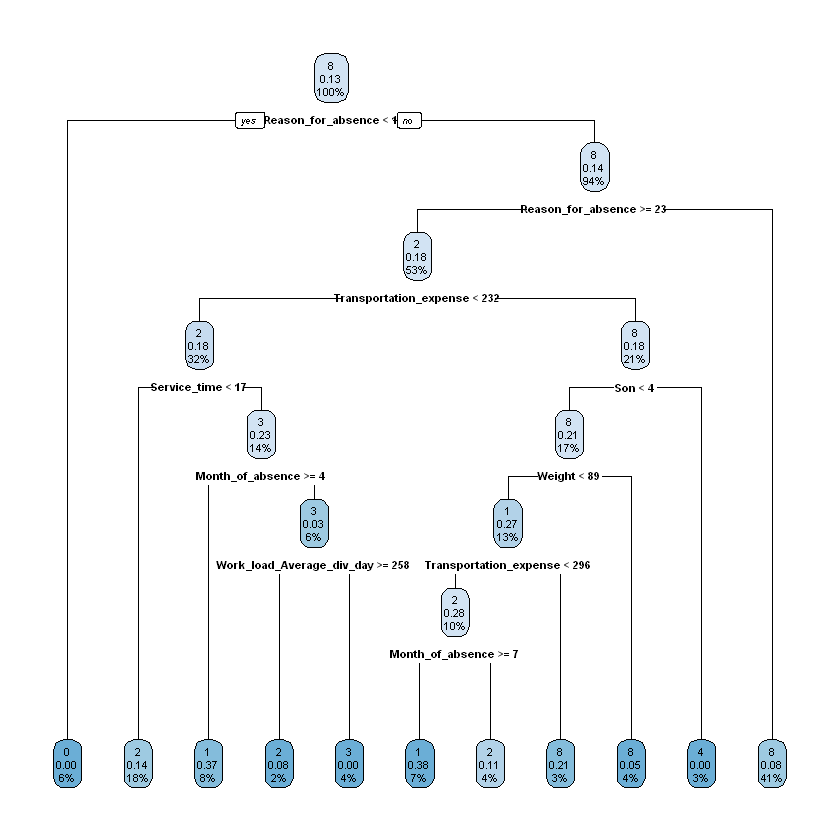

In [13]:
# Decision tree algorithm

dt2 <- rpart(Absenteeism ~ ., data= traindata2, method= "class")
rpart.plot(dt2, type = 2, extra=106, box.palette = "Blues")

In [8]:
# Prediction

predictdata_dt2 <- predict(dt2,testdata2, type="class")

table_mat1_2 <- table(testdata2$Absenteeism, predictdata_dt2)
table_mat1_2

# Accuracy

accuracy_Test1_2 <- sum(diag(table_mat1_2)) / sum(table_mat1_2)
print(paste('Accuracy for decision tree algorithm', accuracy_Test1_2))

     predictdata_dt2
       0  1  2  3  4  5  8 16 24 32 40 56 64 80 104 112 120
  0   13  0  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0
  1    0  9  9  0  0  0  3  0  0  0  0  0  0  0   0   0   0
  2    0  9 35  4  1  0  7  0  0  0  0  0  0  0   0   0   0
  3    0  6 13  4  1  0  7  0  0  0  0  0  0  0   0   0   0
  4    0  1  5  0  5  0  5  0  0  0  0  0  0  0   0   0   0
  5    0  1  1  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  7    0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  8    0  1  7  0  0  0 56  0  0  0  0  0  0  0   0   0   0
  16   0  0  0  0  1  0  6  0  0  0  0  0  0  0   0   0   0
  24   0  0  0  0  0  0  3  0  0  0  0  0  0  0   0   0   0
  32   0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  40   0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  48   0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  64   0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  80   0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0
  120  0  0  0  0  

[1] "Accuracy for decision tree algorithm 0.301801801801802"


In [10]:
# Random forest algorithm

rf2 <- randomForest(formula= Absenteeism ~ ., data = traindata2, ntree= 500, nodesize =5)
rf2

# Number of trees with lowest MSE
which.min(rf2$mse)

# Produce variable importance plot
varImpPlot(rf2)

ERROR: Error in randomForest(formula = Absenteeism ~ ., data = traindata2, ntree = 500, : "randomForest" fonksiyonu bulunamadı


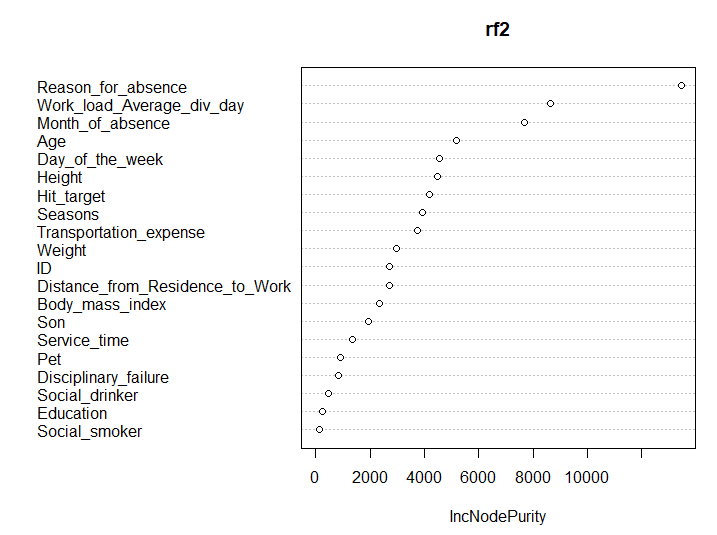

In [11]:
# Tuning
model_tuned2 <- tuneRF(
  traindata2[,1:20], # define predictor variables
  traindata2$Absenteeism, # define response variable
  ntreeTry=500,
  mtryStart=4, 
  stepFactor=1.5,
  improve=0.01,
  trace=FALSE) #don't show real-time progress

best.m2 <- model_tuned2[model_tuned2[, 2] == min(model_tuned2[, 2]), 1]
print(model_tuned2)
print(best.m2)

ERROR: Error in tuneRF(traindata2[, 1:20], traindata2$Absenteeism, ntreeTry = 500, : "tuneRF" fonksiyonu bulunamadı


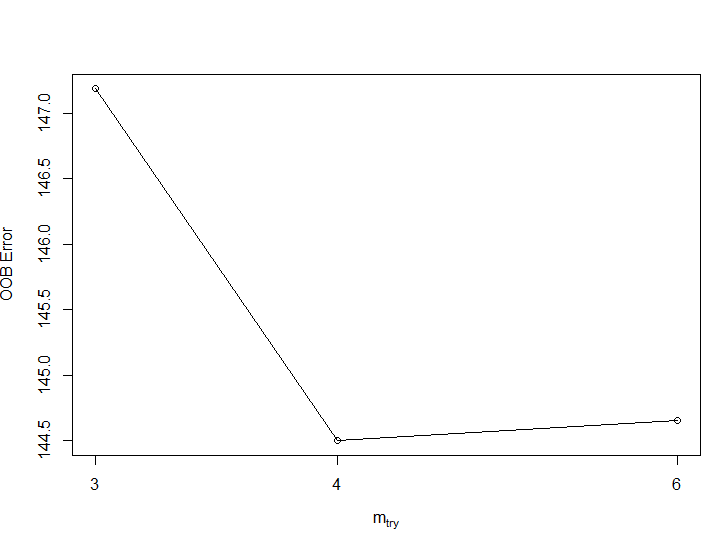

In [14]:
# set best.m
set.seed(321)
rf2 <- randomForest(formula= Absenteeism ~ ., data = traindata2, ntree= 500, mtry=best.m2, nodesize= 5, type="class")
rf2
plot(rf2)

ERROR: Error in randomForest(formula = Absenteeism ~ ., data = traindata2, ntree = 500, : "randomForest" fonksiyonu bulunamadı


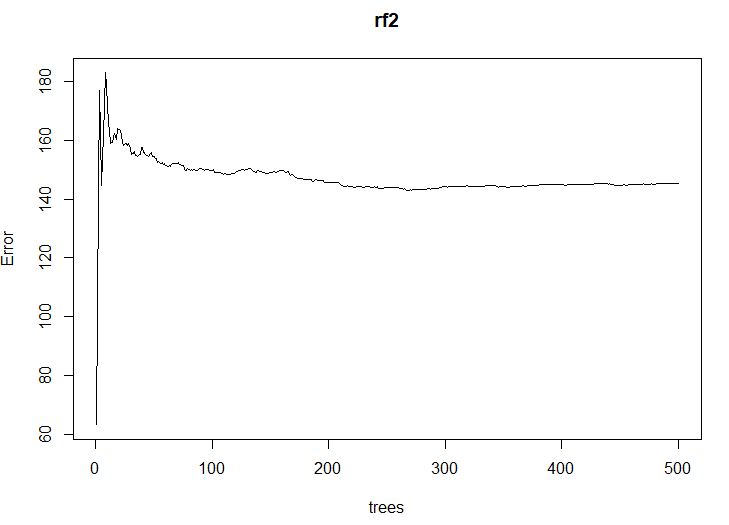

In [15]:
#Prediction
predictdata_rf2 <-predict(rf2, testdata2)
table(predictdata_rf2, testdata2$Absenteeism)

#Accuracy
table_mat2_2 <- table(testdata2$Absenteeism, predictdata_rf2)

accuracy_Test2_2 <- sum(diag(table_mat2_2)) / sum(table_mat2_2)
print(paste('Accuracy for random forest algorithm', accuracy_Test2_2))

ERROR: Error in predict(rf2, testdata2): 'rf2' nesnesi bulunamadı


### Conclusion for Dataset 2

DT accuracy is 30% whereas accuracy in RF is less than 0.4%. DT performed better for this data. 

## Dataset 3 - Turkish Music Emotion
The final dataset Turkish music contains four classes in the dataset: happy, sad, angry, relax. To prepare the dataset, verbal and non-verbal music are selected from different genres of Turkish music. A total of 100 music pieces are determined for each class in the database to have an equal number of samples in each class.

The target output is the emotion of the song. Total number of features are 50 and there are 400 samples.

In [16]:
d3=fread("C:/Users/pinar/Desktop/Acoustic Features.csv")
head(d3)
str(d3)

set.seed(43210)

Class,RMSenergy_Mean,Lowenergy_Mean,Fluctuation_Mean,Tempo_Mean,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,...,Chromagram_Mean_9,Chromagram_Mean_10,Chromagram_Mean_11,Chromagram_Mean_12,HarmonicChangeDetectionFunction_Mean,HarmonicChangeDetectionFunction_Std,HarmonicChangeDetectionFunction_Slope,HarmonicChangeDetectionFunction_PeriodFreq,HarmonicChangeDetectionFunction_PeriodAmp,HarmonicChangeDetectionFunction_PeriodEntropy
relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
relax,0.137,0.510,7.664,116.044,2.313,-0.082,0.365,0.033,-0.136,...,0.064,0.391,0.102,0.000,0.280,0.240,0.355,1.682,0.662,0.958


Classes 'data.table' and 'data.frame':	400 obs. of  51 variables:
 $ Class                                        : chr  "relax" "relax" "relax" "relax" ...
 $ RMSenergy_Mean                               : num  0.052 0.125 0.046 0.135 0.066 0.137 0.123 0.103 0.145 0.129 ...
 $ Lowenergy_Mean                               : num  0.591 0.439 0.639 0.603 0.591 0.51 0.533 0.575 0.542 0.618 ...
 $ Fluctuation_Mean                             : num  9.14 6.68 10.58 10.44 9.77 ...
 $ Tempo_Mean                                   : num  130 142.2 188.2 66 88.9 ...
 $ MFCC_Mean_1                                  : num  4 4.06 2.77 2.84 3.22 ...
 $ MFCC_Mean_2                                  : num  0.363 0.516 0.903 1.552 0.228 ...
 $ MFCC_Mean_3                                  : num  0.887 0.785 0.502 0.612 0.814 0.365 0.939 0.275 0.568 0.537 ...
 $ MFCC_Mean_4                                  : num  0.078 0.397 0.329 0.351 0.096 0.033 0.358 0.269 0.559 -0.116 ...
 $ MFCC_Mean_5              

In [17]:
# Test and train splitting
split3 <- sample(c(rep(0, 0.7 * nrow(d3)), rep(1, 0.3 * nrow(d3))))

traindata3 <- d3[split3 == 0, ]
testdata3 <- d3[split3 == 1, ]

head(traindata3)
head(testdata3)

Class,RMSenergy_Mean,Lowenergy_Mean,Fluctuation_Mean,Tempo_Mean,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,...,Chromagram_Mean_9,Chromagram_Mean_10,Chromagram_Mean_11,Chromagram_Mean_12,HarmonicChangeDetectionFunction_Mean,HarmonicChangeDetectionFunction_Std,HarmonicChangeDetectionFunction_Slope,HarmonicChangeDetectionFunction_PeriodFreq,HarmonicChangeDetectionFunction_PeriodAmp,HarmonicChangeDetectionFunction_PeriodEntropy
relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
relax,0.137,0.510,7.664,116.044,2.313,-0.082,0.365,0.033,-0.136,...,0.064,0.391,0.102,0.000,0.280,0.240,0.355,1.682,0.662,0.958
relax,0.103,0.575,7.006,141.132,3.495,0.553,0.275,0.269,0.257,...,0.128,1.000,0.030,0.746,0.366,0.267,-0.061,0.585,0.711,0.965


Class,RMSenergy_Mean,Lowenergy_Mean,Fluctuation_Mean,Tempo_Mean,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,...,Chromagram_Mean_9,Chromagram_Mean_10,Chromagram_Mean_11,Chromagram_Mean_12,HarmonicChangeDetectionFunction_Mean,HarmonicChangeDetectionFunction_Std,HarmonicChangeDetectionFunction_Slope,HarmonicChangeDetectionFunction_PeriodFreq,HarmonicChangeDetectionFunction_PeriodAmp,HarmonicChangeDetectionFunction_PeriodEntropy
relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
relax,0.123,0.533,7.483,136.444,4.572,1.171,0.939,0.358,0.024,...,0.000,1.000,0.000,0.143,0.210,0.174,0.193,2.691,0.691,0.966
relax,0.129,0.618,8.668,93.020,2.318,0.744,0.537,-0.116,0.119,...,0.127,0.018,0.385,0.000,0.388,0.340,0.122,1.682,0.627,0.965
relax,0.068,0.659,8.580,182.302,2.847,0.211,0.781,0.657,0.008,...,0.418,1.000,0.006,0.266,0.326,0.340,0.133,0.396,0.667,0.953
relax,0.222,0.556,7.344,68.658,3.213,0.805,0.612,0.598,0.065,...,0.206,0.482,0.037,0.809,0.406,0.210,0.064,2.243,0.771,0.969
relax,0.071,0.529,5.490,116.302,1.602,-0.129,0.238,-0.289,-0.027,...,0.905,0.101,0.503,0.371,0.387,0.201,0.009,1.922,0.807,0.967


Warning message:
"extra=106 but the response has 4 levels (only the 2nd level is displayed)"

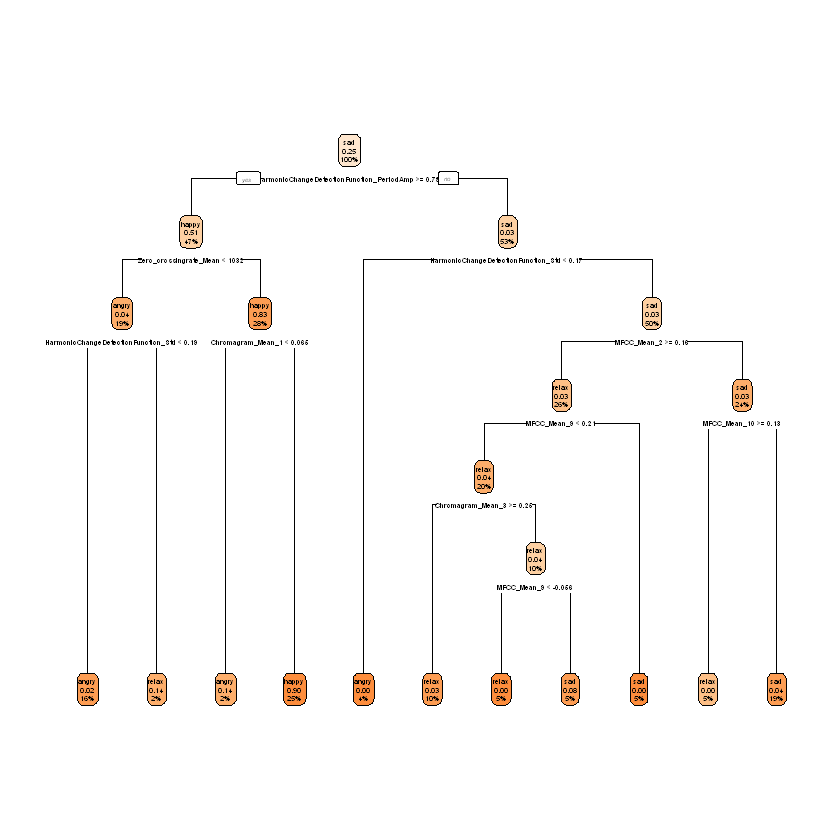

In [18]:
# Decision tree algorithm

dt3 <- rpart(Class ~ ., data= traindata3, method= "class")
rpart.plot(dt3, type = 2, extra=106, box.palette = "Oranges")

In [21]:
# Prediction

predictdata_dt3 <- predict(dt3,testdata3, type="class")

table_mat1_3 <- table(testdata3$Class, predictdata_dt3)
table_mat1_3

# Accuracy
accuracy_Test1_3 <- sum(diag(table_mat1_3)) / sum(table_mat1_3)
print(paste('Accuracy for decision tree algorithm', accuracy_Test1_3))

       predictdata_dt3
        angry happy relax sad
  angry    23     4     2   3
  happy     3    24     0   2
  relax     2     0    16  15
  sad       1     1     4  20

[1] "Accuracy for decision tree algorithm 0.691666666666667"


In [22]:
# Random forest algorithm

rf3 <- randomForest(as.factor(Class) ~ ., data = traindata3, ntree= 500, nodesize =5, type= "class")
rf3

ERROR: Error in randomForest(as.factor(Class) ~ ., data = traindata3, ntree = 500, : "randomForest" fonksiyonu bulunamadı


In [24]:
# Number of trees with lowest MSE
which.min(rf3$mse)

# Produce variable importance plot
varImpPlot(rf3)

# Number of trees with lowest MSE
which.min(rf3$mse)

# Produce variable importance plot
varImpPlot(rf3)

ERROR: Error in which.min(rf3$mse): 'rf3' nesnesi bulunamadı


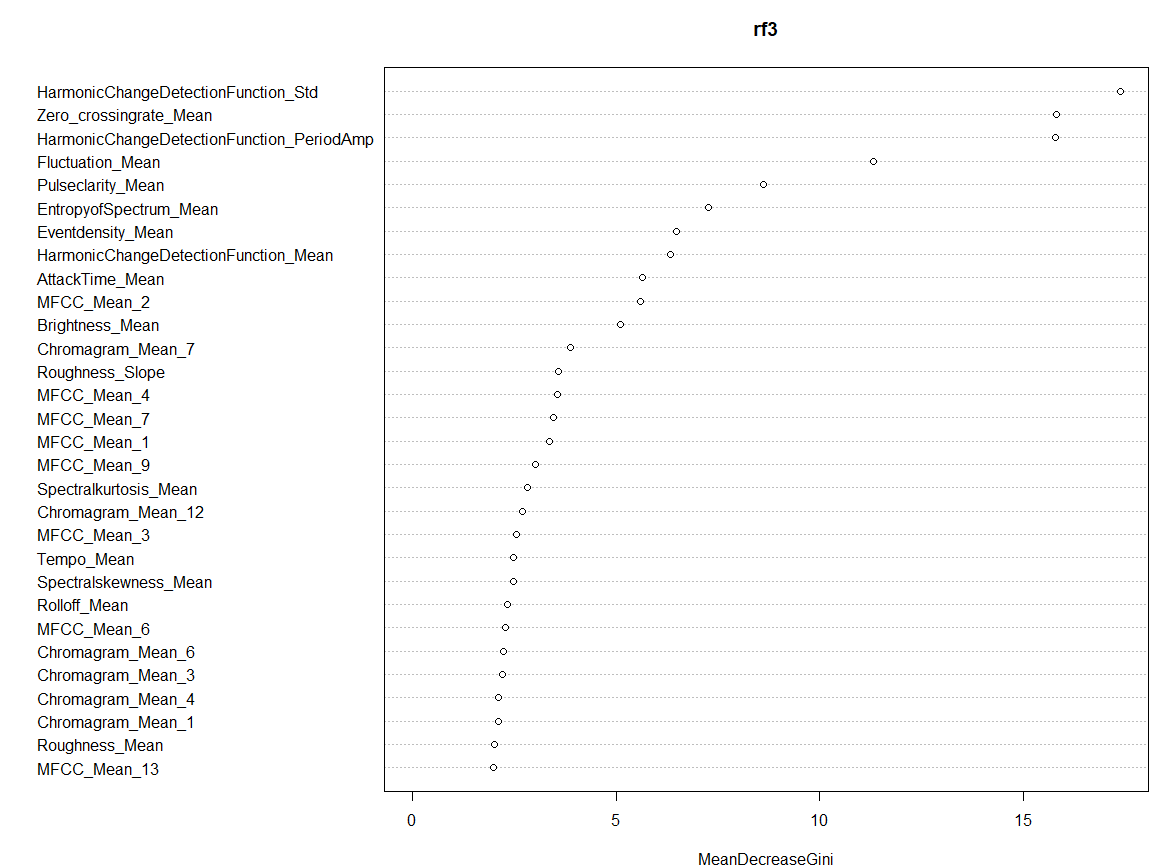

In [25]:
# Tuning
model_tuned3 <- tuneRF(
  traindata3[,2:50], # define predictor variables
  as.factor(traindata3$Class), # define response variable
  ntreeTry=500,
  mtryStart=4, 
  stepFactor=1.5,
  improve=0.01,
  trace=FALSE) #don't show real-time progress

best.m3 <- model_tuned3[model_tuned3[, 2] == min(model_tuned3[, 2]), 1]
print(model_tuned3)
print(best.m3)

ERROR: Error in tuneRF(traindata3[, 2:50], as.factor(traindata3$Class), ntreeTry = 500, : "tuneRF" fonksiyonu bulunamadı


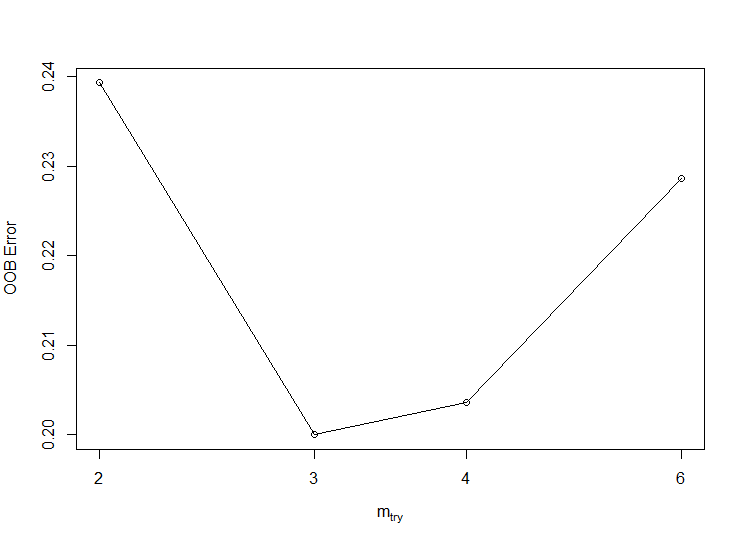

In [26]:
# set best.m
set.seed(3210)
rf3 <- randomForest(as.factor(Class) ~ ., data = traindata3, ntree= 500, mtry=best.m3, nodesize= 5, type="class")
rf3
plot(rf3)

ERROR: Error in randomForest(as.factor(Class) ~ ., data = traindata3, ntree = 500, : "randomForest" fonksiyonu bulunamadı


In [27]:
#Prediction
predictdata_rf3 <-predict(rf3, testdata3)
table(predictdata_rf3, testdata3$Class)

#Accuracy
table_mat2_3 <- table(testdata3$Class, predictdata_rf3)

accuracy_Test2_3 <- sum(diag(table_mat2_3)) / sum(table_mat2_3)
print(paste('Accuracy for random forest algorithm', accuracy_Test2_3))

ERROR: Error in predict(rf3, testdata3): 'rf3' nesnesi bulunamadı


### Conclusion for Dataset 2

DT accuracy is 69% whereas accuracy in RF is less than 85%. RF performed better for this data.  

## Overall Conclusion
RF performed bad at 2 datasets, this can be because they are numeric but the last one is non-numeric.